# Práctica 3 - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, como la maximización o minimización de una función, o el problema de la mochila o del viajante, problemas conocidos cuya resolución se ha abordado con técnicas algorítmicas y que vamos a resolver utilizando algoritmos de búsqueda local. 
En la segunda parte de la práctica se pide resolver un problema dado en el enunciado.

## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state

##### Hill Climbing AIMA:

* Función value
* Función path_cost? Necesaria? Parece que únicamente es necesaria la función value
* Funciones actions-result


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [1]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):
    
    ## Este método es la clave de la generación de vecinos, es un poco lioso:
    ##
    ## El estado es la lista de ciudades en el orden en el que lo vamos a recorrer,
    ## cogemos esta lista, y ponemos al revés una sublista (elegida aleatoriamente).
    ##
    ## [Albacete, Vigo, Sevilla, Cádiz, Santiago, El Bonillo]
    ## [Albacete, Vigo] ++ [Santiago,Cádiz,Sevilla] ++ [El Bonillo]
    ##
    ## Se puede ver su comportamiento con este fragmento de código:
    ## problem = TSP_problem([])
    ## lista   = [1,2,3,4,5,6,7,8]
    ## problem.two_opt(lista)
    
    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state
    
    ## Locura, actions devuelve una lista con un único método, devuelve una puñetera función.
    ## En cualquier estado, la única acción posible es ejecutar el método two_opt sobre el estado
    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    ## Como actions devuelve una lista de funciones (con una sola función), el resultado de aplicar
    ## esa acción es el resultado de aplicar esa función al estado actual
    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = distances[state2[0]][state2[-1]]
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        ## Para algoritmos que maximizan:
        ## return -1 * self.path_cost(None, None, None, state)
        
        ## Para algoritmos que minimizan:
        return self.path_cost(None, None, None, state)

In [2]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

In [3]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos son 75, 140, 118 unidades aparte de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [4]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [5]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

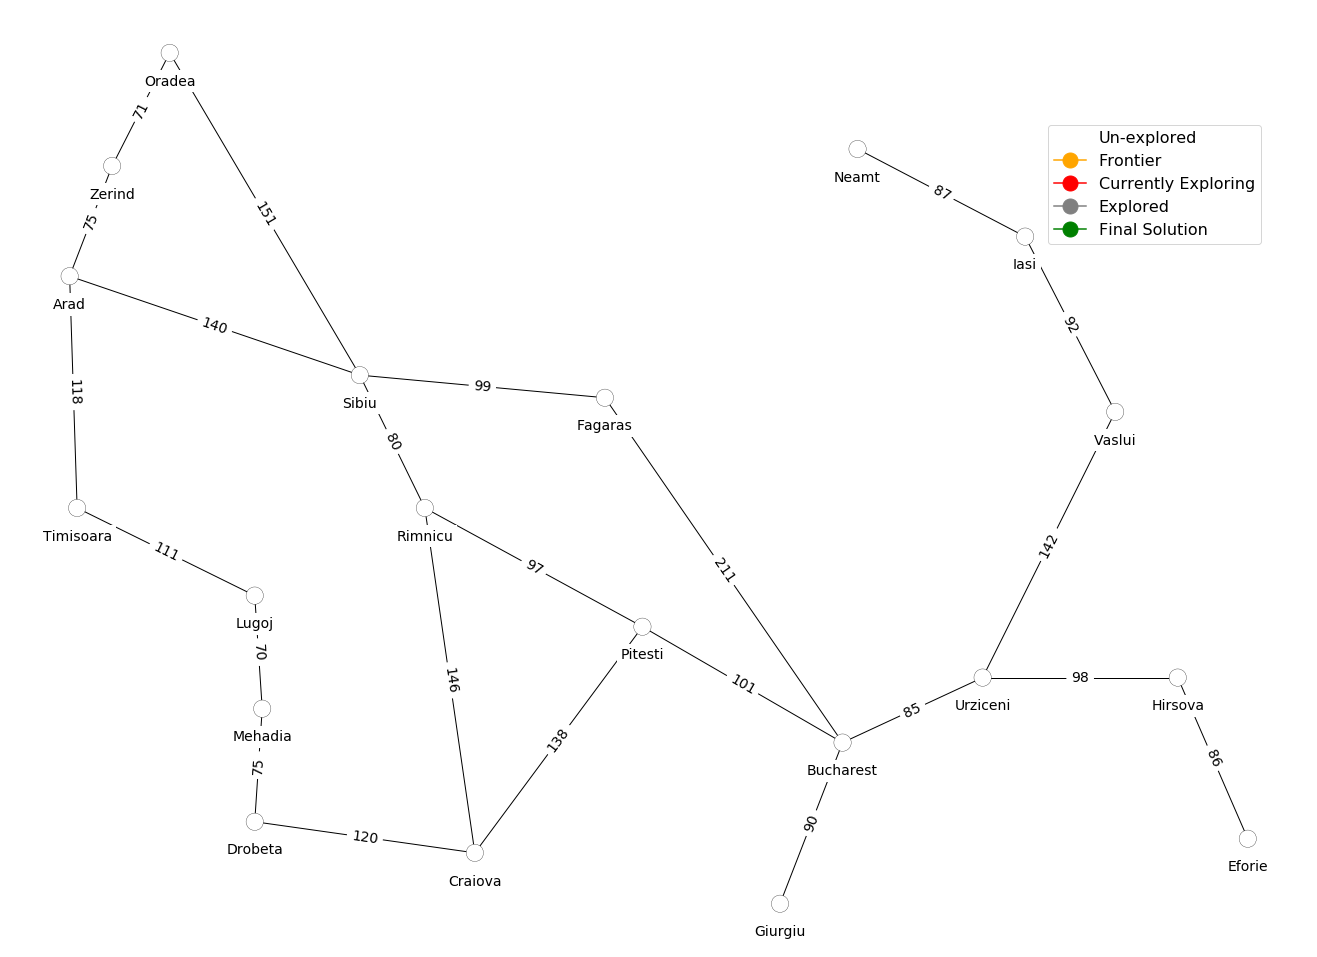

In [7]:
## Muchas veces requiere doble ejecución para mostrar el grafo!
from notebook import show_map, final_path_colors, display_visual
import matplotlib

show_map(romania_graph_data)

In [8]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [9]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se na extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [10]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP

def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 1000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        
        ## Esta condición es innecesaria, siempre se generan 'number_of_neighbors' vecinos 
        if not neighbors:
            break
        
        neighbor = argmax_random_tie(neighbors, key=lambda node: problem.value(node.state))
        
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        
        ## Si queremos parar la primera vez que no conseguimos mejorar el camino con 100 vecinos
        ## else:
        ##     break
            
        iterations -= 1
        
    return current.state

#### ERROR (detectado y modificado):

En la versión de la profesora la función value devuelve el valor preparado para ser maximizado pero nuestra definición del hill_climbing está hecha para minimizar. En definitiva, el problema no buscaba soluciones mejores que la inicial, sino peores.


Al cambiarlo por mucho que aumente el número de nodos vecinos que se generan no es capaz de encontrar soluciones mejores a la inicial.

In [11]:
# Y lo resolvemos con escalada. 
tsp = TSP_problem(random.shuffle(all_cities))
tsp = TSP_problem(all_cities)
recorrido = hill_climbing(tsp)

print("Coste recorrido alfabético: {}".format(4264.191423518199))
print("Coste recorrido hallado:    {}".format(tsp.value(recorrido)))
print(recorrido)

Coste recorrido alfabético: 4264.191423518199
Coste recorrido hallado:    4658.971264425621
['Giurgiu', 'Iasi', 'Hirsova', 'Oradea', 'Zerind', 'Rimnicu', 'Pitesti', 'Neamt', 'Vaslui', 'Timisoara', 'Craiova', 'Urziceni', 'Sibiu', 'Drobeta', 'Lugoj', 'Fagaras', 'Bucharest', 'Arad', 'Eforie', 'Mehadia']


['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

**Coste:** 4264.191423518199
**Observaciones:** Es del recorrido en orden alfabético!!! Se consigue incluso parando la primera vez que no escala

['Iasi', 'Neamt', 'Oradea', 'Lugoj', 'Sibiu', 'Drobeta', 'Timisoara', 'Craiova', 'Mehadia', 'Rimnicu', 'Zerind', 'Fagaras', 'Urziceni', 'Bucharest', 'Hirsova', 'Vaslui', 'Giurgiu', 'Arad', 'Pitesti', 'Eforie']

**Coste:** 3511.935432055667 **Observaciones:** EL MEJOR CONSEGUIDO

['Timisoara', 'Vaslui', 'Eforie', 'Rimnicu', 'Lugoj', 'Pitesti', 'Fagaras', 'Mehadia', 'Drobeta', 'Urziceni', 'Giurgiu', 'Bucharest', 'Craiova', 'Iasi', 'Oradea', 'Neamt', 'Hirsova', 'Arad', 'Sibiu', 'Zerind']

**Coste:** 4070.841677957242 


['Giurgiu', 'Bucharest', 'Eforie', 'Neamt', 'Timisoara', 'Pitesti', 'Mehadia', 'Drobeta', 'Arad', 'Vaslui', 'Fagaras', 'Lugoj', 'Sibiu', 'Oradea', 'Iasi', 'Craiova', 'Zerind', 'Rimnicu', 'Urziceni', 'Hirsova']

**Coste:** 4094.296968811157

--------------- HALLADOS CUANDO LA FUNCIÓN MAXIMIZABA  ----------

['Oradea', 'Neamt', 'Eforie', 'Hirsova', 'Urziceni', 'Rimnicu', 'Craiova', 'Sibiu', 'Timisoara', 'Mehadia', 'Giurgiu', 'Fagaras', 'Zerind', 'Pitesti', 'Bucharest', 'Arad', 'Vaslui', 'Drobeta', 'Lugoj', 'Iasi']

**Coste:** 4349.5770938210735

['Bucharest', 'Eforie', 'Hirsova', 'Sibiu', 'Oradea', 'Giurgiu', 'Urziceni', 'Rimnicu', 'Arad', 'Pitesti', 'Fagaras', 'Neamt', 'Zerind', 'Mehadia', 'Iasi', 'Lugoj', 'Drobeta', 'Vaslui', 'Timisoara', 'Craiova']

**Coste:** 4485.387291438276

Algunas conclusiones breves:

Salvo que me haya pasado de listo el código que nos dieron estaba mal, lo que es una gran chapuza. Las conclusiones son que depende muchísimo de la función two_opt, esto es, de las modificaciones por las que se pasa de un estado a sus vecinos.

Además, es mejor ejecutarlo muchas veces con menos iteraciones que menos veces con muchísimas iteraciones. La mejor solución encontrada se halló con 1000 iteraciones y no con 10000 o 100000.

Aun más, lo mejor es descomentar el else que le he añadido a nuestro hill_climbing (así para en cuanto no es capaz de mejorar la solución en una iteración, lo que lo hace mucho más rápido en general) y ejecutarlo muchas más veces. 


### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza un análisis razonado de las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución. 

¿Ha encontrado el algoritmo el óptimo global? 
¿Ha encontrado la misma solución en distintas ejecuciones?

Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo y relacionarlo con otros algoritmos vistos en clase. 

Opcionalmente se puede hacer la comparativa real con algún algoritmo de búsqueda exhaustiva. 


## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el punto más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [1]:
from search import *

In [2]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

## [3, 7, 2, 8]
## [5, 2, 9, 1] 
## [5, 3, 3, 1]

In [3]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    ## Dónde leches está definida la función vector_add??
    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] < self.n and next_state[1] < self.m:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [4]:
problem = PeakFindingProblem(initial, grid, directions4)

In [5]:
## Lo resolvemos 100 veces con enfriamiento simulado, nos quedamos la mejor solución
##
## Está cambiado para que se resuelva sólo una vez porque es cuando más anomalías se detectan
solutions = {problem.value(simulated_annealing(problem)) for i in range(1)}
max(solutions)

3

**Francis:**

He borrado la implementación del HillClimbing de aquí porque es igual que el de AIMA si no me equivoco,
era redundante. Lo importante son las conclusiones, con directions4 el problema al resolverse con hill_climbing
se queda estancado porque empieza en un óptimo local, con enfriamiento simulado esto no pasa porque una vez que 
salimos de este óptimo local (lo que sí que puede pasar con este algoritmo) sí que seguimos escalando correctamente.

En definitiva, mismo problema, celda de arriba resuelto por enfriamiento simulado, celda de abajo por escalada, el de enfriamiento simulado le gana al de escalada, halla solución mejor y muy rápidamente. Es interesante ver que si en vez de resolver el problema con enfriamiento simulado 100 veces, si lo resolvemos sólo una o dos veces los resultados son mucho peores, depende mucho del factor de aleatoriedad, de la temperatura.


**DUDA:**

Por qué si el valor del estado inicial es 3 y se busca maximizar, al resolver el problema por enfriamiento simulado podemos decir que el valor máximo es 2 o incluso 1? Veo lógico que aceptemos acciones que no mejoran nuestra solución actual pero no que nos olvidemos de que hay mejores. Hay que revisar el algoritmo.

In [6]:
## Con estas acciones (directions4), el punto inicial (0,0) es máximo local
problem = PeakFindingProblem(initial, grid, directions4)
solution = problem.value(hill_climbing(problem))
solution

7

In [7]:
## Con estas acciones (directions8) sí que hallamos el óptimo global
problem = PeakFindingProblem(initial, grid, directions8)
solution = problem.value(hill_climbing(problem))
solution

9

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 
 
Ejemplo de rejilla para pruebas

grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


In [48]:
initial = (4, 5)
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]

problem4 = PeakFindingProblem(initial, grid, directions4)
problem8 = PeakFindingProblem(initial, grid, directions8)

In [50]:
max(problem4.value(simulated_annealing(problem4)) for i in range(50))

11.2

In [51]:
problem4.value(hill_climbing(problem4))

6.5

In [52]:
max(problem8.value(simulated_annealing(problem8)) for i in range(50))

11.2

In [53]:
problem8.value(hill_climbing(problem8))

6.5

**Francis:**

En definitiva, para este caso en concreto y empezando en la posición (0,0) el algoritmo de escalada es nefasto porque si las acciones son únicamente ir a celdas vecinas y todas tienen el mismo valor (estamos en una meseta), nunca salimos de la meseta.

Los algoritmos de enfriamiento simulado, dependiendo de su ejecución, a veces salen de la meseta y otras no, normalmente con ejecutarlos unas 50 veces en este caso no aseguramos con bastante certeza llegar al óptimo.

## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [54]:
import random

In [55]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado en el conjunto de los números naturales menores que 2^{10}.

In [56]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [57]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

## Cruzar es coger la mitad del genotipo del padre y la mitad de la madre
def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

## Mutar es cambiar la representación binaria de un único bit con una determinada probabilidad
##
## A pesar de que los genes posibles son un parámetro del problema, esta función está hecha para
## mutar únicamente los genes en [0,1]
def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

## El fitness para maximizar x² es ver cuanto vale el número en binario al cuadrado
def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [58]:
cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

In [59]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1329

1329

In [60]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1766241 (= 1329²)

1766241

In [61]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [62]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Salida esperada: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

Creación de una instancia del problema:

Aun nos falta saber definir una población inicia, saber cómo aplicar las mutaciones a la población, una función de selección para saber los individuos que queremos cruzar...

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [63]:
def poblacion_inicial(problema_genetico, size):
    nueva_poblacion = []
    for i in range(size):
        genotipo = []
        for i in range(problema_genetico.longitud_individuos):
            genotipo.append(random.choice(problema_genetico.genes))
        nueva_poblacion.append(genotipo)
    return nueva_poblacion

In [64]:
poblacion_inicial(cuadrados,10)

[[0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]]

In [65]:
def cruza_padres(problema_genetico,padres):
    nueva_poblacion = []
    for i in range(0,len(padres),2):
        nueva_poblacion += problema_genetico.cruza(padres[i],padres[i+1])
    return nueva_poblacion

In [66]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)

# Salida esperada:
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [67]:
def muta_individuos(problema_genetico, poblacion, prob):
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.
    nueva_poblacion = []
    for individuo in poblacion:
        nueva_poblacion.append(problema_genetico.muta(individuo,prob))
    return nueva_poblacion

In [68]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [69]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

### Ejercicio 4

Se pide definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

INDICACIÓN: Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [70]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        
        ## Para qué leches vale esta línea??
        #  opt(poblacion, key=problema_genetico.fitness)
        
        seleccionados.append(seleccionado)
        
        ## Si queremos evitar repetidos en la selección (descomentar si no)
        #  poblacion.remove(seleccionado)
    return seleccionados  

In [71]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1]]

In [72]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

In [73]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    ## Generamos una población inicial
    poblacion= poblacion_inicial(problema_genetico,size)
    
    ## Tomamos el número de padres (siempre par) y no padres en base a la proporción dada
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    
    ## Hacemos avanzar ngen generaciones nuestra población
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)
    
    ## Nos quedamos con el mejor individuo en base a nuestra función de fitness
    ## devolvemos su fenotipo (decodificación) y valor (función fitness)
    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [74]:
# Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    ## Realizamos la selección por torneo
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres ,  k,opt)
    ## Realizamos los cruces, la siguiente generación son los cruces de los padres y
    ## k elementos seleccionados por torneo de los no padres
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    ## Aplicamos mutaciones
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 5.  Ejecutar el algoritmo genético anterior, para resolver el problema de cuadrados (tanto en minimización como en maximización).  

Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):

In [75]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

(0, 0)

In [76]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1023, 1046529)

**Francis:**

Lo curioso es eso, que nadie guía al algoritmo salvo la aleatoriedad, y la función de selección por torneo. En este caso, como la función a optimizar es la función cuadrática en un intervalo [0,2^k-1], que es monótona, el algoritmo de máxima pendiente (con acciones correctamente definidas) hallaría el óptimo en todo caso. Con el algoritmo genético a veces la selección por torneo no elige siempre al de mayor valor (como sí que hace el hill_climbing) y no hallamos el mínimo/máximo absoluto.

Podemos cambiar parámetros muy interesantes que afectan directamente la precisión del algoritmo como el número de generaciones que se calculan. También podemos analizar modificaciones de otros parámetros como el porcentaje de padres o la probabilidad de mutación.

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 6
Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.

Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.

La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que no se puede sobrepasar el peso máximo de la mochila.

In [90]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            peso_en_mochila += pesos[i]    
            l.append(1)
        else:
            l.append(0)
    return l 

In [91]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 6)

[1, 1, 0, 0, 1]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   = 7

In [92]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    peso_en_mochila = 0
    valor = 0
    
    for i in range(n_objetos):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            peso_en_mochila += pesos[i]    
            valor += valores[i]

    return valor

In [93]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [94]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [95]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [96]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

 Modificamos la interfaz de las funciones definidas para respetar la que requiere la clase ProblemaGenetico.

In [97]:
def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v

In [98]:
def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 15, pesos2, 750)
    return v

In [99]:
def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v

### Ejercicio 7

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

In [100]:
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)

Algunas de las salidas posibles variando los parámetros.

In [115]:
print("{} generaciones: {}".format(100,algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)))
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

100 generaciones: ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)


In [116]:
print("{} generaciones: {}".format(100,algoritmo_genetico(m2g,3,max,100,50,0.8,0.05)))   
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
      
print("{} generaciones: {}".format(200,algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)))  
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
    
print("{} generaciones: {}".format(200,algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)))  
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

100 generaciones: ([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], 1430)
200 generaciones: ([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], 1444)
200 generaciones: ([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], 1436)


In [114]:
## Esta ejecución es muy lenta, resuelve el problema con distinto número de generaciones
## llegando hasta profundidad 2000.

print("{} generaciones: {}".format(400,algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)))
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
                                   
print("{} generaciones: {}".format(600,algoritmo_genetico(m3g,4,max,600,200,0.75,0.1)))
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
                                   
print("{} generaciones: {}".format(1000,algoritmo_genetico(m3g,4,max,1000,200,0.75,0.1)))
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
                                   
print("{} generaciones: {}".format(1000,algoritmo_genetico(m3g,3,max,1000,100,0.75,0.1)))
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
                                   
print("{} generaciones: {}".format(2000,algoritmo_genetico(m3g,3,max,2000,100,0.75,0.1)))
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
                                   
print("{} generaciones: {}".format(2000,algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)))
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

400 generaciones: ([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 13461293)
600 generaciones: ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
1000 generaciones: ([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], 13433569)
1000 generaciones: ([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], 13517399)
2000 generaciones: ([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], 13497192)
2000 generaciones: ([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], 13515028)


**Francis:**

En conclusiones en este apartado hay que poner que no nos vale para nada o casi nada a partir de un cierto punto incrementar el número de generaciones. Nos es mucho más interesante aumentar ligeramente la probabilidad de cruce o ejecutar el algoritmo varias veces con distintas poblaciones iniciales para un número de generaciones menor.